# Basic pandas optimizations

This chapter offers a brief introduction on how to efficiently work with pandas DataFrames. You'll learn the various options you have for iterating over a DataFrame. Then, you'll learn how to efficiently apply functions to data stored in a DataFrame.

## Intro to pandas DataFrame iteration

1. Intro to pandas DataFrame iteration
So far, we've focused on Python's built-in data structures. Now, we'll shift gears and focus on one of the most popular data analytics tools: the pandas DataFrame.

2. pandas recap
You should be familiar with pandas before continuing with this course. If not, consider refreshing your pandas knowledge with the great overview provided in the DataCamp course listed here. Just to recap, pandas is a library used for data analysis. The main construct of pandas is the DataFrame, a tabular data structure with labeled rows and columns. This chapter will focus on the best approaches for iterating over a DataFrame. Let's begin by analyzing a Major League Baseball dataset.

3. Baseball stats
We've collected team stats for each Major League Baseball team from the year 1962 to 2012, which are stored in a pandas DataFrame named baseball_df.

4. Baseball stats
The Team column is each baseball team's abbreviated name. The first team, ARI, represents the Arizona Diamondbacks.

5. Baseball stats
All other columns in this DataFrame represent specific statistics for each team in a given Year or season. We'll cover what the RS, RA, and Playoffs columns mean in later exercises. For now, we'll focus on the W column, which specifies the number of wins a team had in a season and the G column that contains the number of games a team played in a season.

6. Calculating win percentage
One popular statistic used to evaluate a team's performance for a given season is the team's win percentage. This metric is calculated by dividing a team's total wins by number of games played. We've written a simple function to perform this calculation. If a team wins 50 out of 100 games, we see that our function returns the correct result.

7. Adding win percentage to DataFrame
We'd like to create a new column in our baseball_df DataFrame that stores each team's win percentage for a season. To do this, we'll need to iterate over the DataFrame's rows and apply our calc_win_perc function. First, we create an empty win_perc_list to store all the win percentages we'll calculate. Then, we write a loop that will iterate over each row of the DataFrame. Notice that we are using an index variable (i) that ranges from zero to the number of rows that exist within the DataFrame. We then use the dot-iloc method to lookup each individual row within the DataFrame using the index variable. Now, we grab each team's wins and games played by referencing the W and G columns. Next, we pass the team's wins and games played to calc_win_perc to calculate the win percentages. Finally, we append win_perc to win_perc_list and continue the loop. We create our desired column in the DataFrame, called WP, by setting the column value equal to the win_perc_list.

8. Adding win percentage to DataFrame
Printing the first five rows of our DataFrame, we see that the win percentage column now appears.

9. Iterating with .iloc
Looping over the DataFrame with dot-iloc gave us our desired output, but is it efficient? When estimating the runtime, the dot-iloc approach took 183 milliseconds, which is pretty inefficient.

10. Iterating with .iterrows()
pandas comes with a few efficient methods for looping over a DataFrame. The first method we'll cover is the dot-iterrows method. This is similar to the dot-iloc method, but dot-iterrows returns each DataFrame row as a tuple of (index, pandas Series) pairs. This means each object returned from dot-iterrows contains the index of each row as the first element and the data in each row as a pandas Series as the second element. Notice that we still create the empty win_perc_list, but now we don't have to create an index variable to look up each row within the DataFrame. dot-iterrows handles the indexing for us! The remainder of the for loop stays the same to create a new win percentage column within our baseball_df DataFrame.

11. Iterating with .iterrows()
Using dot-iterrows takes roughly half the time dot-iloc takes to iterate over our DataFrame. We'll explore more efficient ways to loop over a DataFrame later on in the chapter. But for now, we know that using dot-iloc is not efficient and shouldn't be used to iterate over a DataFrame.

12. Practice DataFrame iterating with .iterrows()
Now, let's practice iterating over a DataFrame using dot-iterrows!

### Iterating with .iterrows()

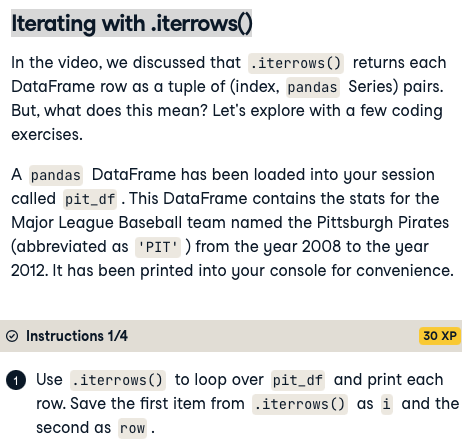

In [ ]:
  Team League  Year   RS   RA   W    G  Playoffs
0  PIT     NL  2012  651  674  79  162         0
1  PIT     NL  2011  610  712  72  162         0
2  PIT     NL  2010  587  866  57  162         0
3  PIT     NL  2009  636  768  62  161         0
4  PIT     NL  2008  735  884  67  162         0

In [ ]:
# Iterate over pit_df and print each row
for ____,____ in ____.____:
    print(row)

In [ ]:
# Iterate over pit_df and print each row
for i, row in pit_df.iterrows():
    print(row)

In [ ]:
<script.py> output:
    Team         PIT
    League        NL
    Year        2012
    RS           651
    RA           674
    W             79
    G            162
    Playoffs       0
    Name: 0, dtype: object
    Team         PIT
    League        NL
    Year        2011
    RS           610
    RA           712
    W             72
    G            162
    Playoffs       0
    Name: 1, dtype: object
    Team         PIT
    League        NL
    Year        2010
    RS           587
    RA           866
    W             57
    G            162
    Playoffs       0
    Name: 2, dtype: object
    Team         PIT
    League        NL
    Year        2009
    RS           636
    RA           768
    W             62
    G            161
    Playoffs       0
    Name: 3, dtype: object
    Team         PIT
    League        NL
    Year        2008
    RS           735
    RA           884
    W             67
    G            162
    Playoffs       0
    Name: 4, dtype: object

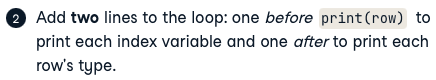

In [ ]:
# Iterate over pit_df and print each index variable and then each row
for i,row in pit_df.iterrows():
    ____
    print(row)
    ____

In [ ]:
# Iterate over pit_df and print each index variable and then each row
for i,row in pit_df.iterrows():
    print(i)
    print(row)
    print(type(row))

In [ ]:
<script.py> output:
    0
    Team         PIT
    League        NL
    Year        2012
    RS           651
    RA           674
    W             79
    G            162
    Playoffs       0
    Name: 0, dtype: object
    <class 'pandas.core.series.Series'>
    1
    Team         PIT
    League        NL
    Year        2011
    RS           610
    RA           712
    W             72
    G            162
    Playoffs       0
    Name: 1, dtype: object
    <class 'pandas.core.series.Series'>
    2
    Team         PIT
    League        NL
    Year        2010
    RS           587
    RA           866
    W             57
    G            162
    Playoffs       0
    Name: 2, dtype: object
    <class 'pandas.core.series.Series'>
    3
    Team         PIT
    League        NL
    Year        2009
    RS           636
    RA           768
    W             62
    G            161
    Playoffs       0
    Name: 3, dtype: object
    <class 'pandas.core.series.Series'>
    4
    Team         PIT
    League        NL
    Year        2008
    RS           735
    RA           884
    W             67
    G            162
    Playoffs       0
    Name: 4, dtype: object
    <class 'pandas.core.series.Series'>

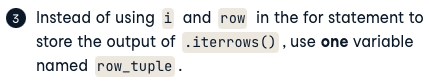

In [ ]:
# Use one variable instead of two to store the result of .iterrows()
for ____ in ____.____:
    print(row_tuple)

In [ ]:
# Use one variable instead of two to store the result of .iterrows()
for row_tuple in pit_df.iterrows():
    print(row_tuple)

In [ ]:
<script.py> output:
    (0, Team         PIT
    League        NL
    Year        2012
    RS           651
    RA           674
    W             79
    G            162
    Playoffs       0
    Name: 0, dtype: object)
    (1, Team         PIT
    League        NL
    Year        2011
    RS           610
    RA           712
    W             72
    G            162
    Playoffs       0
    Name: 1, dtype: object)
    (2, Team         PIT
    League        NL
    Year        2010
    RS           587
    RA           866
    W             57
    G            162
    Playoffs       0
    Name: 2, dtype: object)
    (3, Team         PIT
    League        NL
    Year        2009
    RS           636
    RA           768
    W             62
    G            161
    Playoffs       0
    Name: 3, dtype: object)
    (4, Team         PIT
    League        NL
    Year        2008
    RS           735
    RA           884
    W             67
    G            162
    Playoffs       0
    Name: 4, dtype: object)

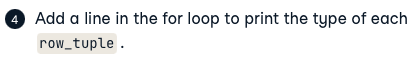

In [ ]:
# Print the row and type of each row
for row_tuple in pit_df.iterrows():
    print(row_tuple)
    ____

In [ ]:
# Print the row and type of each row
for row_tuple in pit_df.iterrows():
    print(row_tuple)
    print(type(row_tuple))

In [ ]:
<script.py> output:
    (0, Team         PIT
    League        NL
    Year        2012
    RS           651
    RA           674
    W             79
    G            162
    Playoffs       0
    Name: 0, dtype: object)
    <class 'tuple'>
    (1, Team         PIT
    League        NL
    Year        2011
    RS           610
    RA           712
    W             72
    G            162
    Playoffs       0
    Name: 1, dtype: object)
    <class 'tuple'>
    (2, Team         PIT
    League        NL
    Year        2010
    RS           587
    RA           866
    W             57
    G            162
    Playoffs       0
    Name: 2, dtype: object)
    <class 'tuple'>
    (3, Team         PIT
    League        NL
    Year        2009
    RS           636
    RA           768
    W             62
    G            161
    Playoffs       0
    Name: 3, dtype: object)
    <class 'tuple'>
    (4, Team         PIT
    League        NL
    Year        2008
    RS           735
    RA           884
    W             67
    G            162
    Playoffs       0
    Name: 4, dtype: object)
    <class 'tuple'>

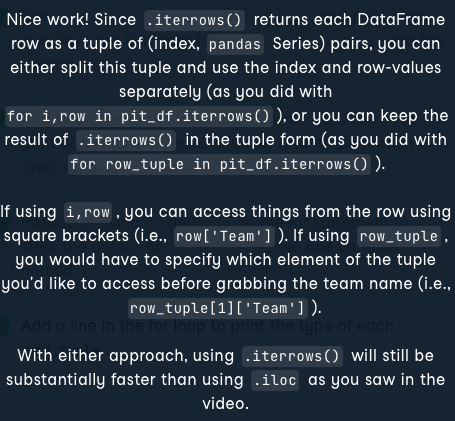

### Run differentials with .iterrows()

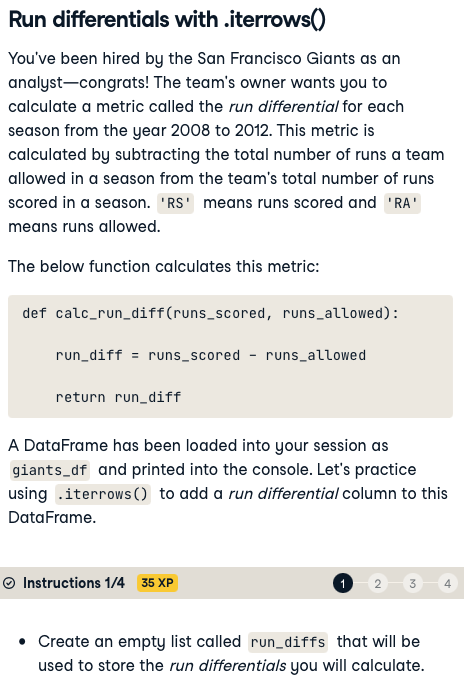

In [ ]:
  Team League  Year   RS   RA   W    G  Playoffs
0  SFG     NL  2012  718  649  94  162         1
1  SFG     NL  2011  570  578  86  162         0
2  SFG     NL  2010  697  583  92  162         1
3  SFG     NL  2009  657  611  88  162         0
4  SFG     NL  2008  640  759  72  162         0

In [ ]:
# Create an empty list to store run differentials
____ = ____

In [ ]:
# Create an empty list to store run differentials
run_diffs = []

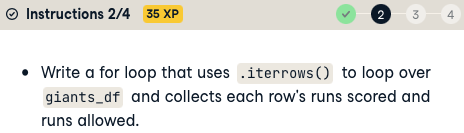

In [ ]:
# Create an empty list to store run differentials
run_diffs = []

# Write a for loop and collect runs allowed and runs scored for each row
for ____,____ in ____.____:
    runs_scored = ____[____]
    runs_allowed = ____[____]

In [ ]:
# Create an empty list to store run differentials
run_diffs = []

# Write a for loop and collect runs allowed and runs scored for each row
for i, row in giants_df.iterrows():
    runs_scored = row['RS']
    runs_allowed = row['RA']

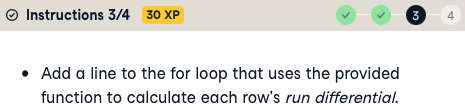

In [ ]:
# Create an empty list to store run differentials
run_diffs = []

# Write a for loop and collect runs allowed and runs scored for each row
for i,row in giants_df.iterrows():
    runs_scored = row['RS']
    runs_allowed = row['RA']
    
    # Use the provided function to calculate run_diff for each row
    run_diff = ____(____, ____)

In [ ]:
# Create an empty list to store run differentials
run_diffs = []

# Write a for loop and collect runs allowed and runs scored for each row
for i,row in giants_df.iterrows():
    runs_scored = row['RS']
    runs_allowed = row['RA']
    
    # Use the provided function to calculate run_diff for each row
    run_diff = calc_run_diff(runs_scored, runs_allowed)

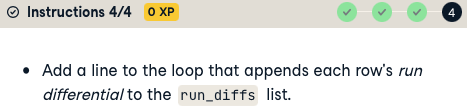

In [ ]:
# Create an empty list to store run differentials
run_diffs = []

# Write a for loop and collect runs allowed and runs scored for each row
for i,row in giants_df.iterrows():
    runs_scored = row['RS']
    runs_allowed = row['RA']
    
    # Use the provided function to calculate run_diff for each row
    run_diff = calc_run_diff(runs_scored, runs_allowed)
    
    # Append each run differential to the output list
    ____.____(____)

giants_df['RD'] = run_diffs
print(giants_df)

In [ ]:
# Create an empty list to store run differentials
run_diffs = []

# Write a for loop and collect runs allowed and runs scored for each row
for i,row in giants_df.iterrows():
    runs_scored = row['RS']
    runs_allowed = row['RA']
    
    # Use the provided function to calculate run_diff for each row
    run_diff = calc_run_diff(runs_scored, runs_allowed)
    
    # Append each run differential to the output list
    run_diffs.append(run_diff)

giants_df['RD'] = run_diffs
print(giants_df)

In [ ]:
<script.py> output:
      Team League  Year   RS   RA   W    G  Playoffs   RD
    0  SFG     NL  2012  718  649  94  162         1   69
    1  SFG     NL  2011  570  578  86  162         0   -8
    2  SFG     NL  2010  697  583  92  162         1  114
    3  SFG     NL  2009  657  611  88  162         0   46
    4  SFG     NL  2008  640  759  72  162         0 -119

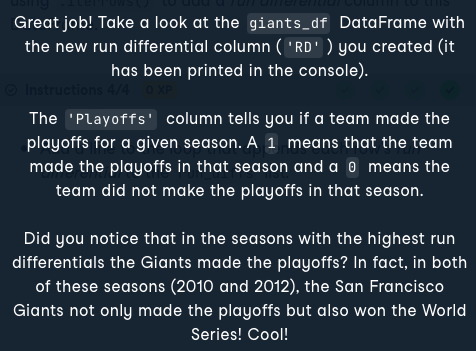

## Another iterator method: .itertuples()

1. Another iterator method: .itertuples()
In the previous lesson, we covered how to iterate over a pandas DataFrame row by row using the dot-iterrows method. pandas also comes with a similar iteration method called dot-itertuples that is often more efficient that dot-iterrows. Let's continue using our baseball dataset to compare these two methods.

2. Team wins data
Suppose we have a pandas DataFrame called team_wins_df that contains each team's total wins in a season.

3. Iterating with .iterrows()
If we use dot-iterrows to loop over our team_wins_df DataFrame and print each row's tuple, we see that each row's values are stored as a pandas Series. Remember, dot-iterrows returns each DataFrame row as a tuple of (index, pandas Series) pairs, so we have to access the row's values with square bracket indexing.

4. Iterating with .itertuples()
But, we could use dot-itertuples to loop over our DataFrame rows instead. The dot-itertuples method returns each DataFrame row as a special data type called a namedtuple. A namedtuple is one of the specialized data types that exist within the collections module we've discussed previously. These data types behave just like a Python tuple but have fields accessible using attribute lookup. What does this mean? Notice in the output that each printed row_namedtuple has an Index attribute and each column in our team_wins_df as an attribute. That means we can access each of these attributes with a lookup using a dot method. Here, we can print the last row_namedtuple's Index using row_namedtuple-dot-Index. We can print this row_namedtuple's Team with row_namedtuple-dot-Team, Year with row_namedtuple-dot-Year and so on.

5. Comparing methods
When we compare dot-iterrows to dot-itertuples, we see that there is quite a bit of improvement! The reason dot-itertuples is more efficient than dot-iterrows is due to the way each method stores its output. Since dot-iterrows returns each row's values as a pandas Series, there is a bit more overhead.

6. Attribute lookup caveat
One more quick note about the differences between these methods. When using dot-iterrows, we can use square brackets to reference a column within our team_wins_df DataFrame. Here, we are printing the Team column for each row in our DataFrame. If we use the same syntax with dot-itertuples, we get a TypeError. This is due to the fact that namedtuples don't support square brackets like a pandas Series does. When looking up an attribute within a namedtuple, we must use a dot to reference the attribute. So anytime we use dot-itertuples we have to use a dot when referring to a column within our DataFrame. If we replace our square bracket notation with a dot, we see that the Teams are correctly printed out.

7. Let's keep iterating!
Now, let's put our new skill to the test and practice efficiently looping over rows of a DataFrame using dot-itertuples.